In [65]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
import blob_transformation as bt
from DMS2_utils import *
from DMS2_fetch_protocol_data import *

# settings
%load_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# ANIMAL_IDS = ["R610", "R611", "R612", "R613", "R614"]
# ANIMAL_ID = "R611"
# SESSION = 911940
# bdata = dj.create_virtual_module("bdata", "bdata")
animal_ids=None
drop_trial_report=False

In [47]:
df = fetch_latest_training_data()

fetched 1 sessions for R610 between 2023-04-13 and 2023-04-13
fetched 1 sessions for R611 between 2023-04-13 and 2023-04-13
fetched 1 sessions for R612 between 2023-04-13 and 2023-04-13
fetched 1 sessions for R613 between 2023-04-13 and 2023-04-13
fetched 1 sessions for R614 between 2023-04-13 and 2023-04-13


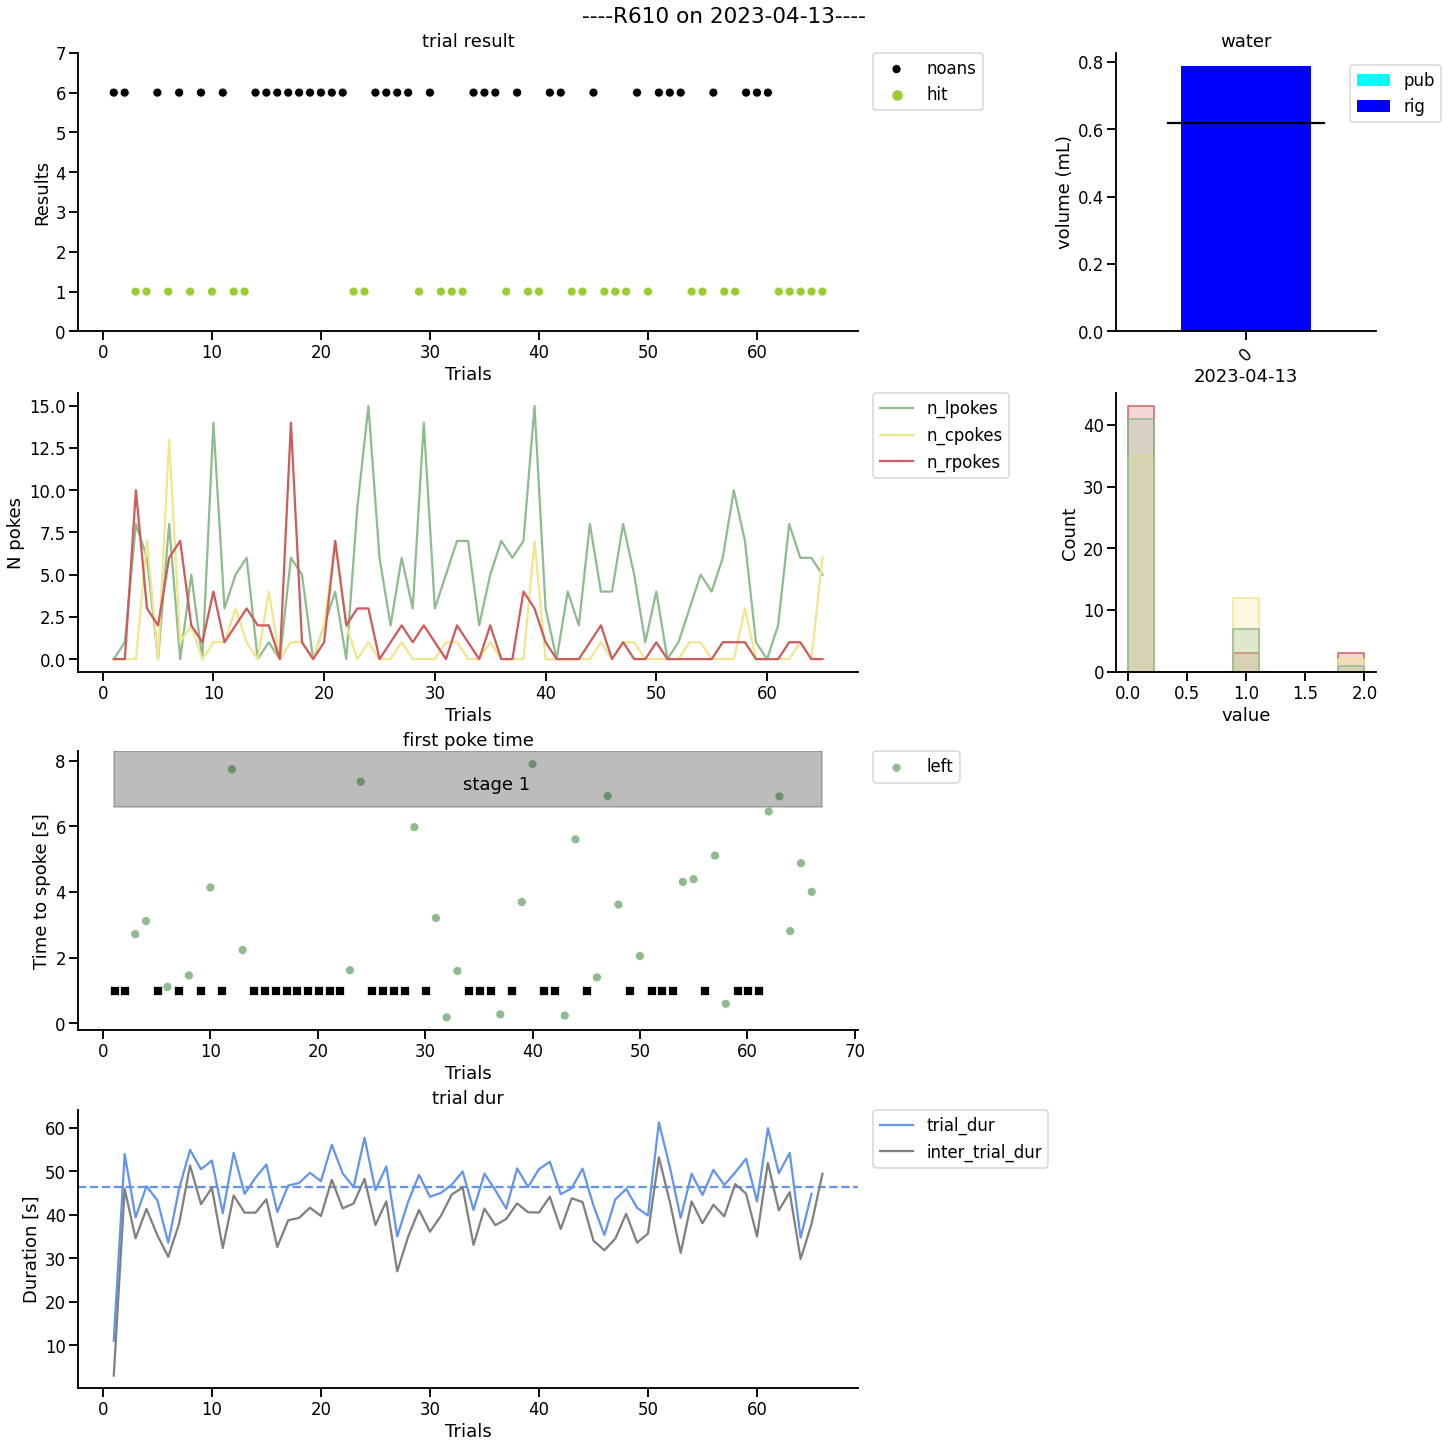

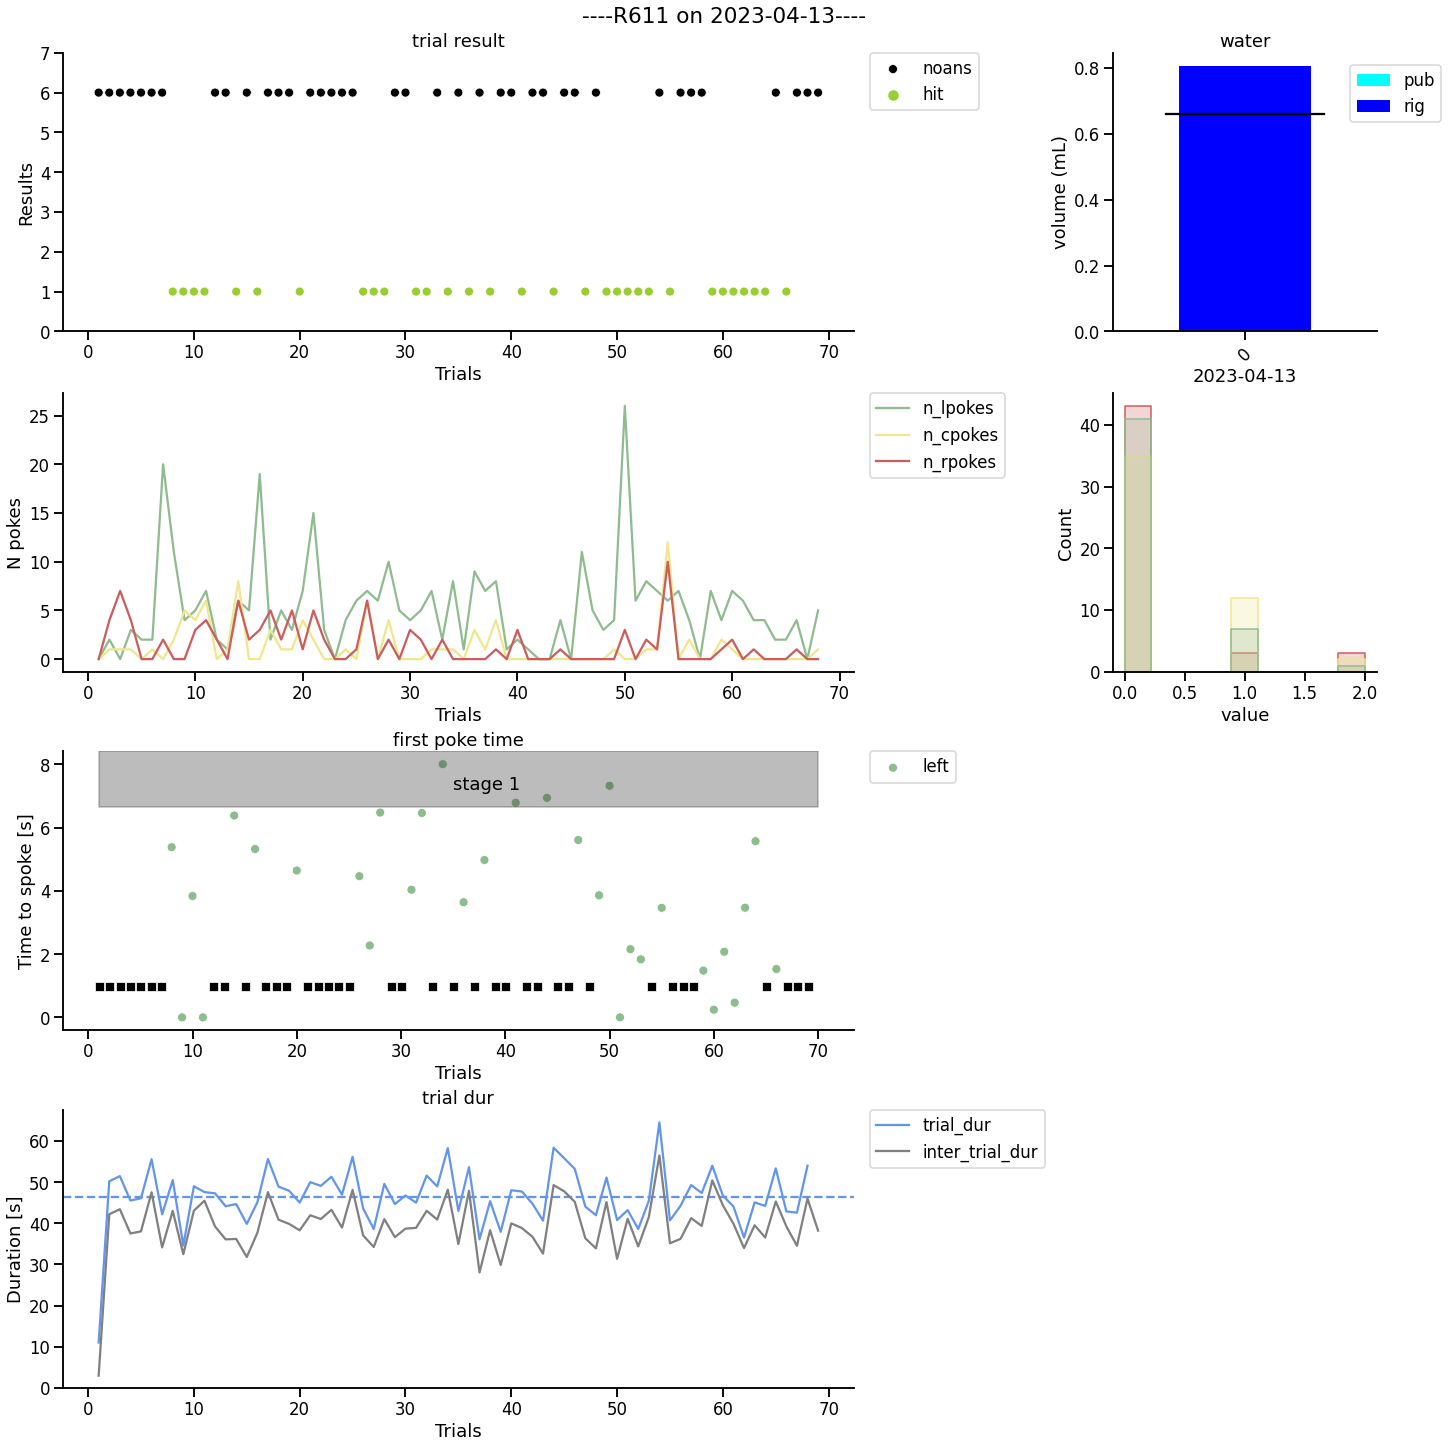

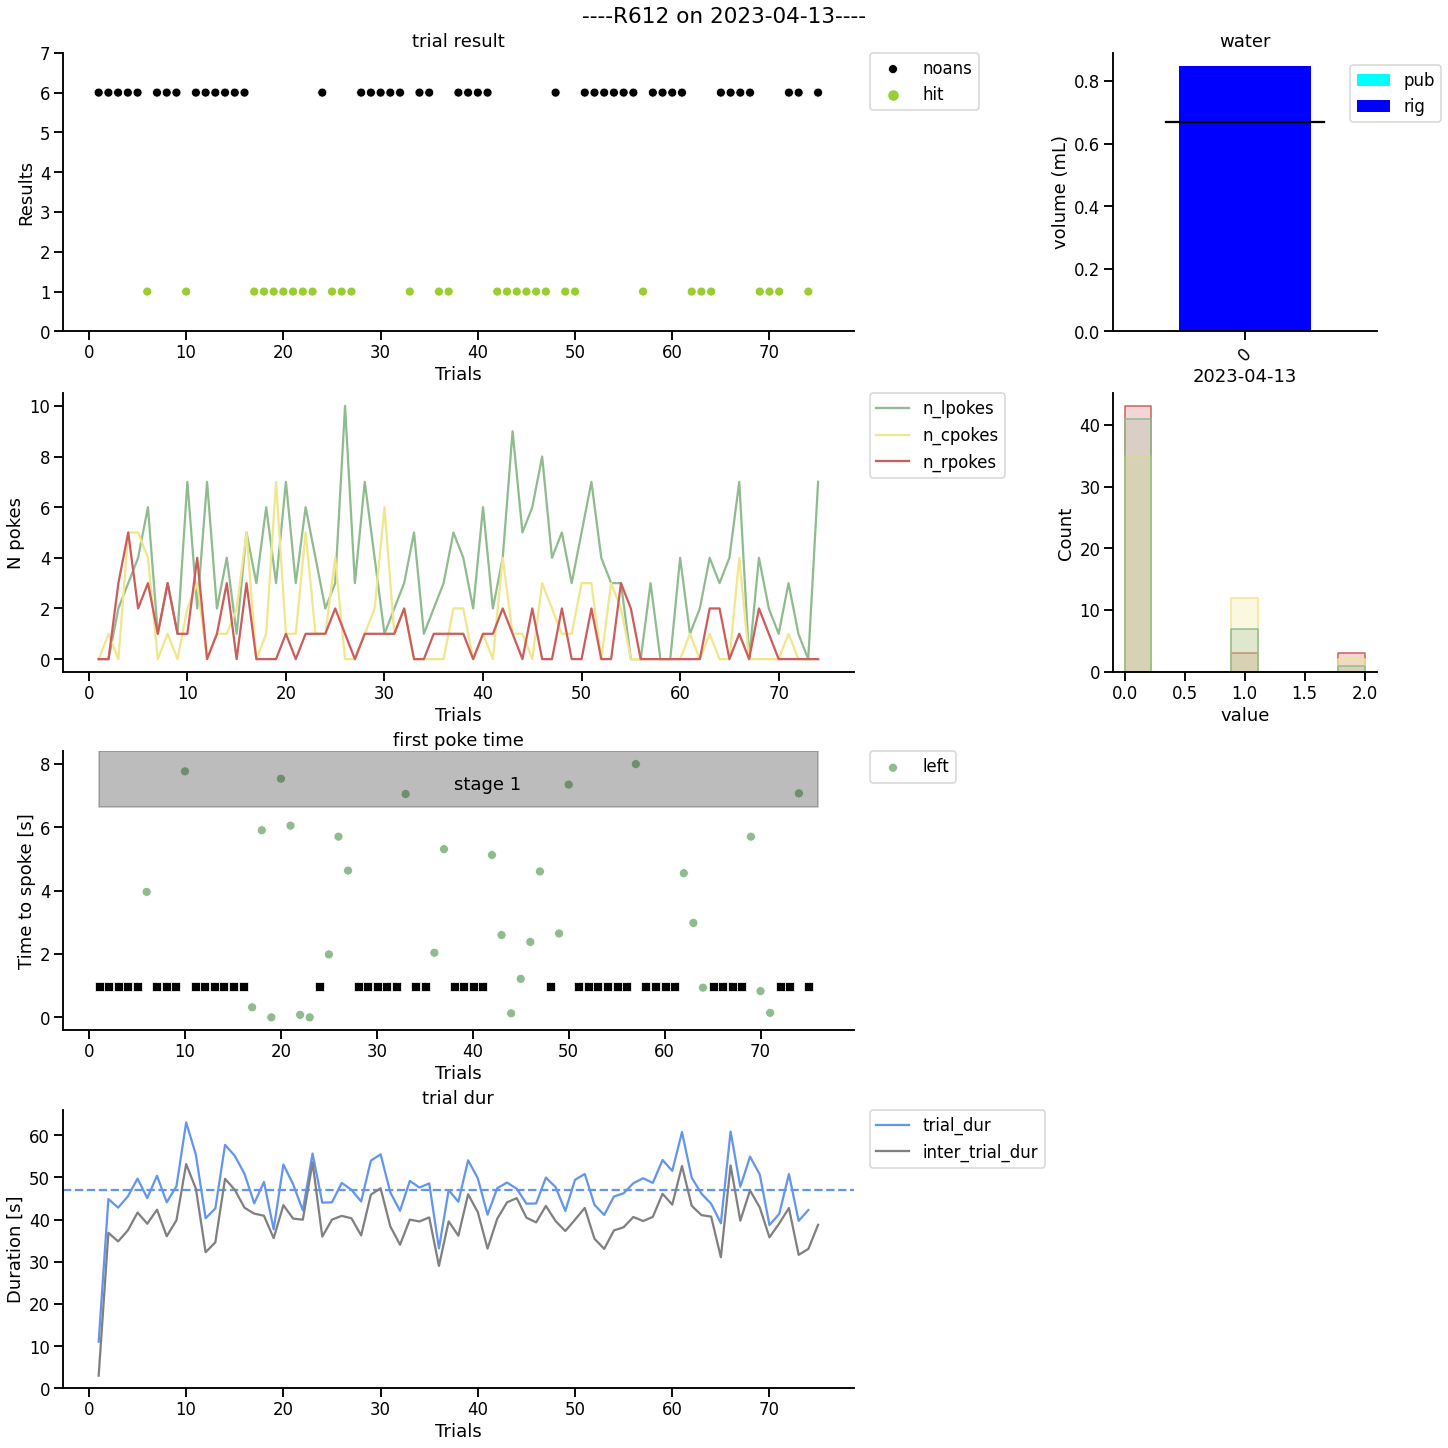

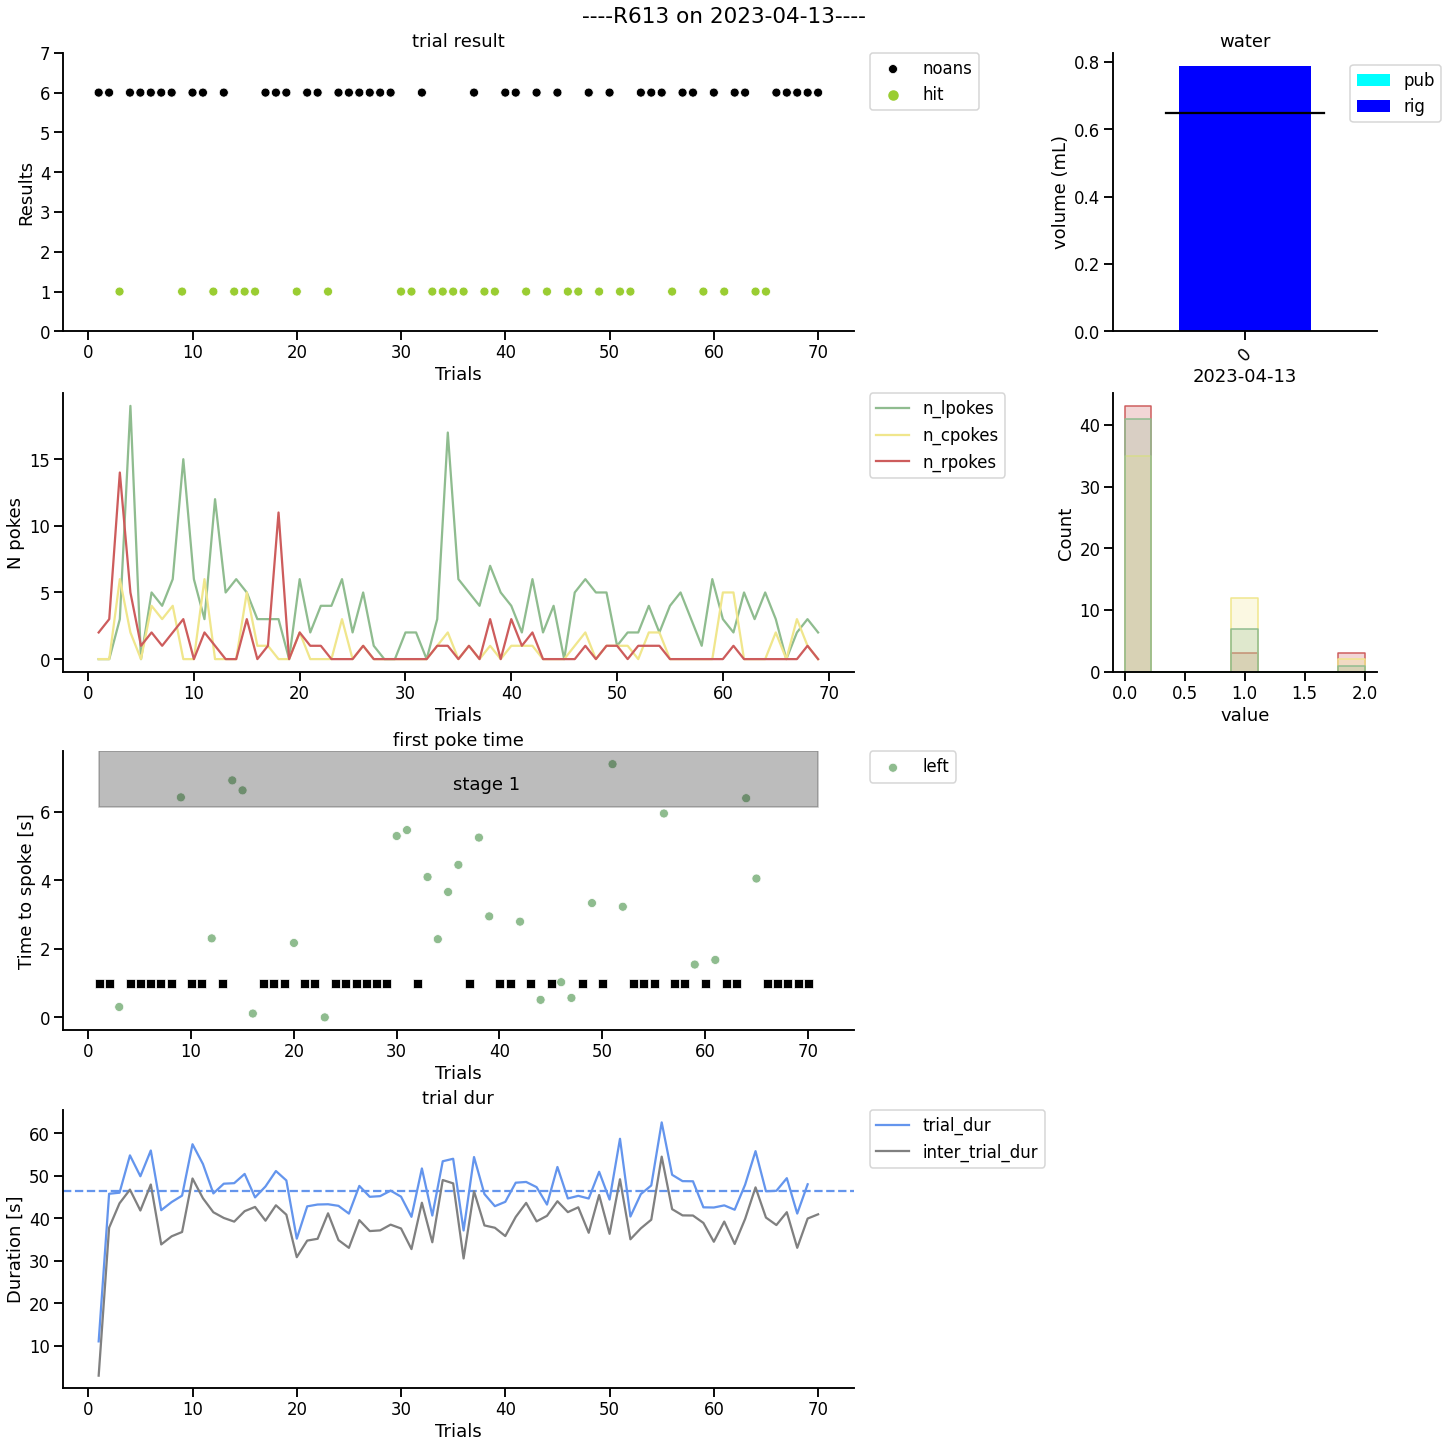

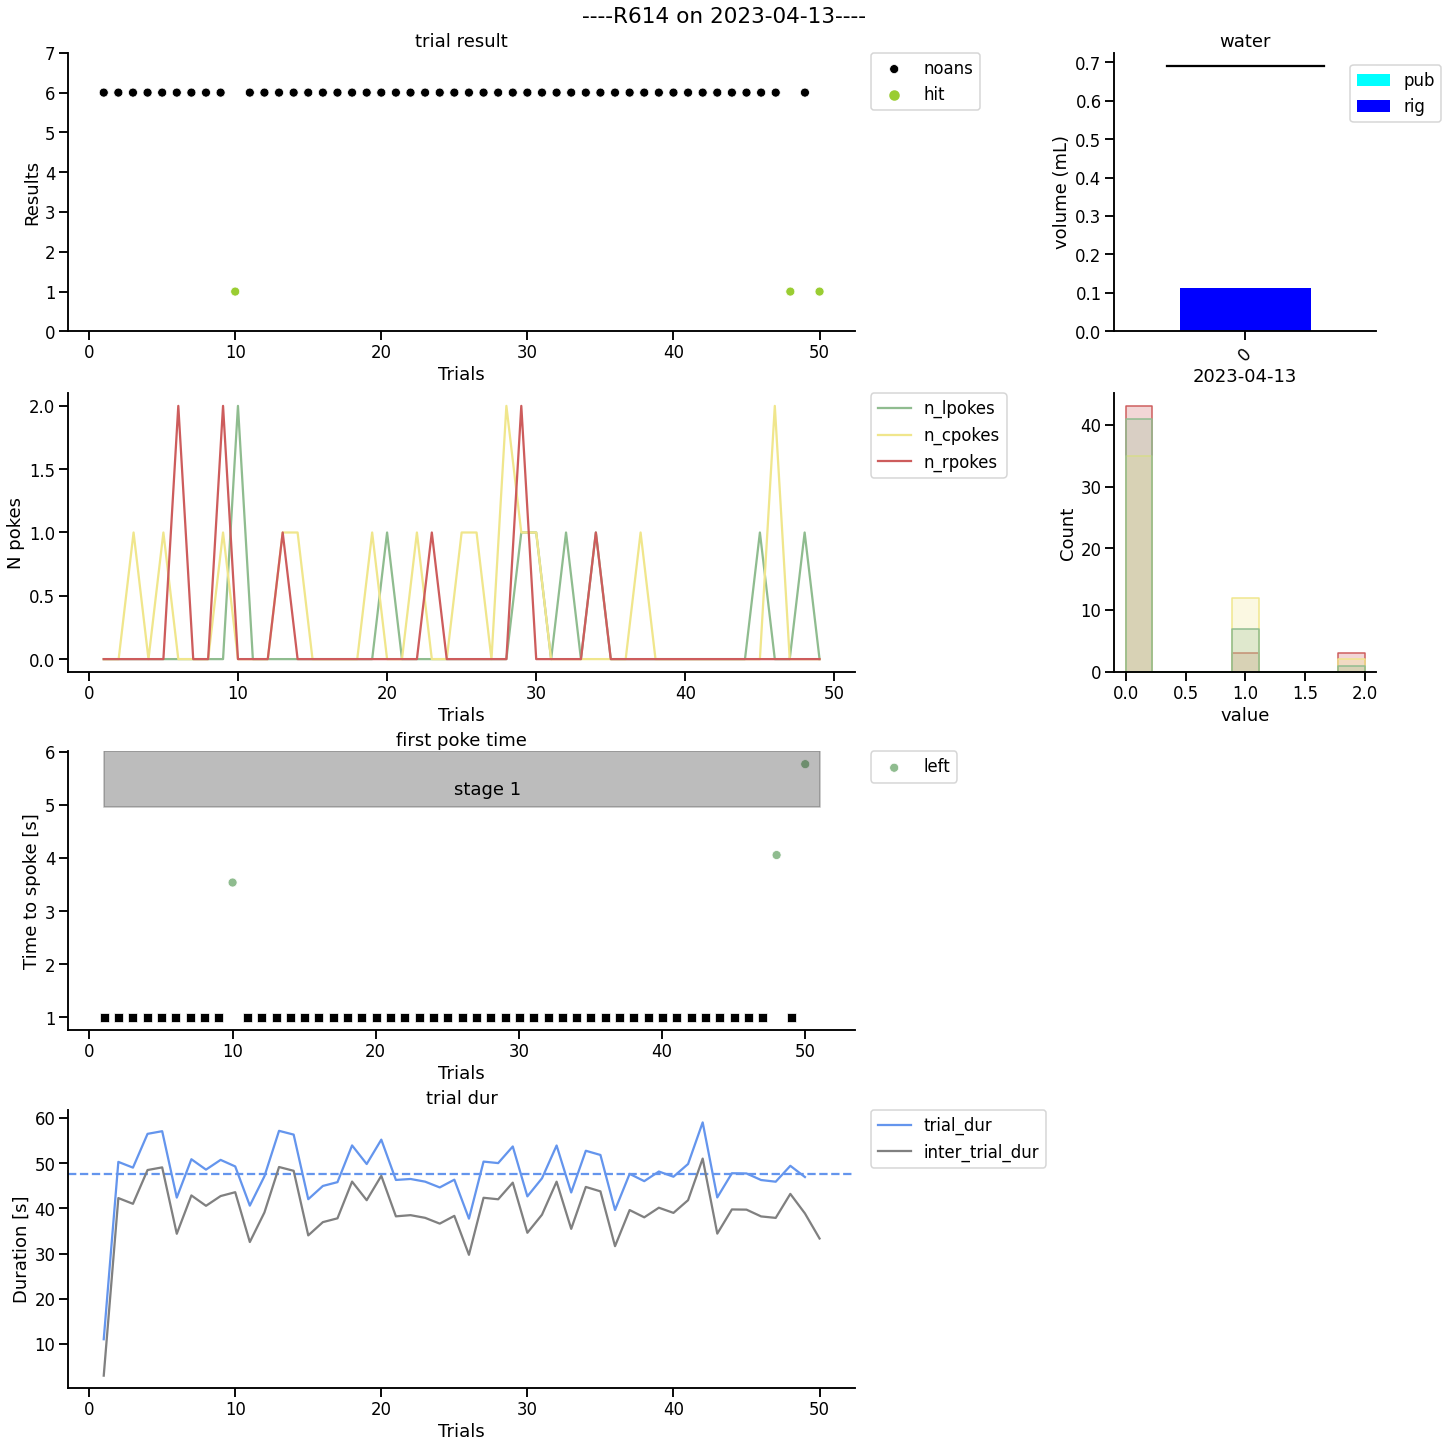

In [115]:
for aid, sub_df in df.groupby('animal_id'):
    layout="""
    AAAB
    CCCD
    EEE.
    FFF.
    """
    fig = plt.figure(constrained_layout=True,figsize=(20,20))
    plt.suptitle(f"----{aid} on {sub_df.date[0]}----")
    ax_dict = fig.subplot_mosaic(layout) #ax to plot to
    # identify_axes(ax_dict) # prints the letter for id

    plot_daily_results(sub_df,ax=ax_dict['A'], title="trial result")
    plot_daily_water(sub_df, ax_dict['B'], title= "water")
    plot_daily_npokes(sub_df,ax_dict['C'], plot_stage_info=False)
    plot_daily_first_spoke(sub_df, ax_dict['E'], title="first poke time",plot_stage_info=True)
    plot_daily_trial_dur(sub_df, ax_dict['F'], title="trial dur")


    sns.histplot(data=pokes_df, x="value",
            palette=["darkseagreen", "khaki", "indianred"],
            hue="variable",
            element="step", ax=ax_dict['D'], legend=False)


In [52]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : Dict[str, Axes]
        Mapping between the title / label and the Axes.

    fontsize : int, optional
        How big the label should be
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

<AxesSubplot:label='D', xlabel='value', ylabel='Count'>

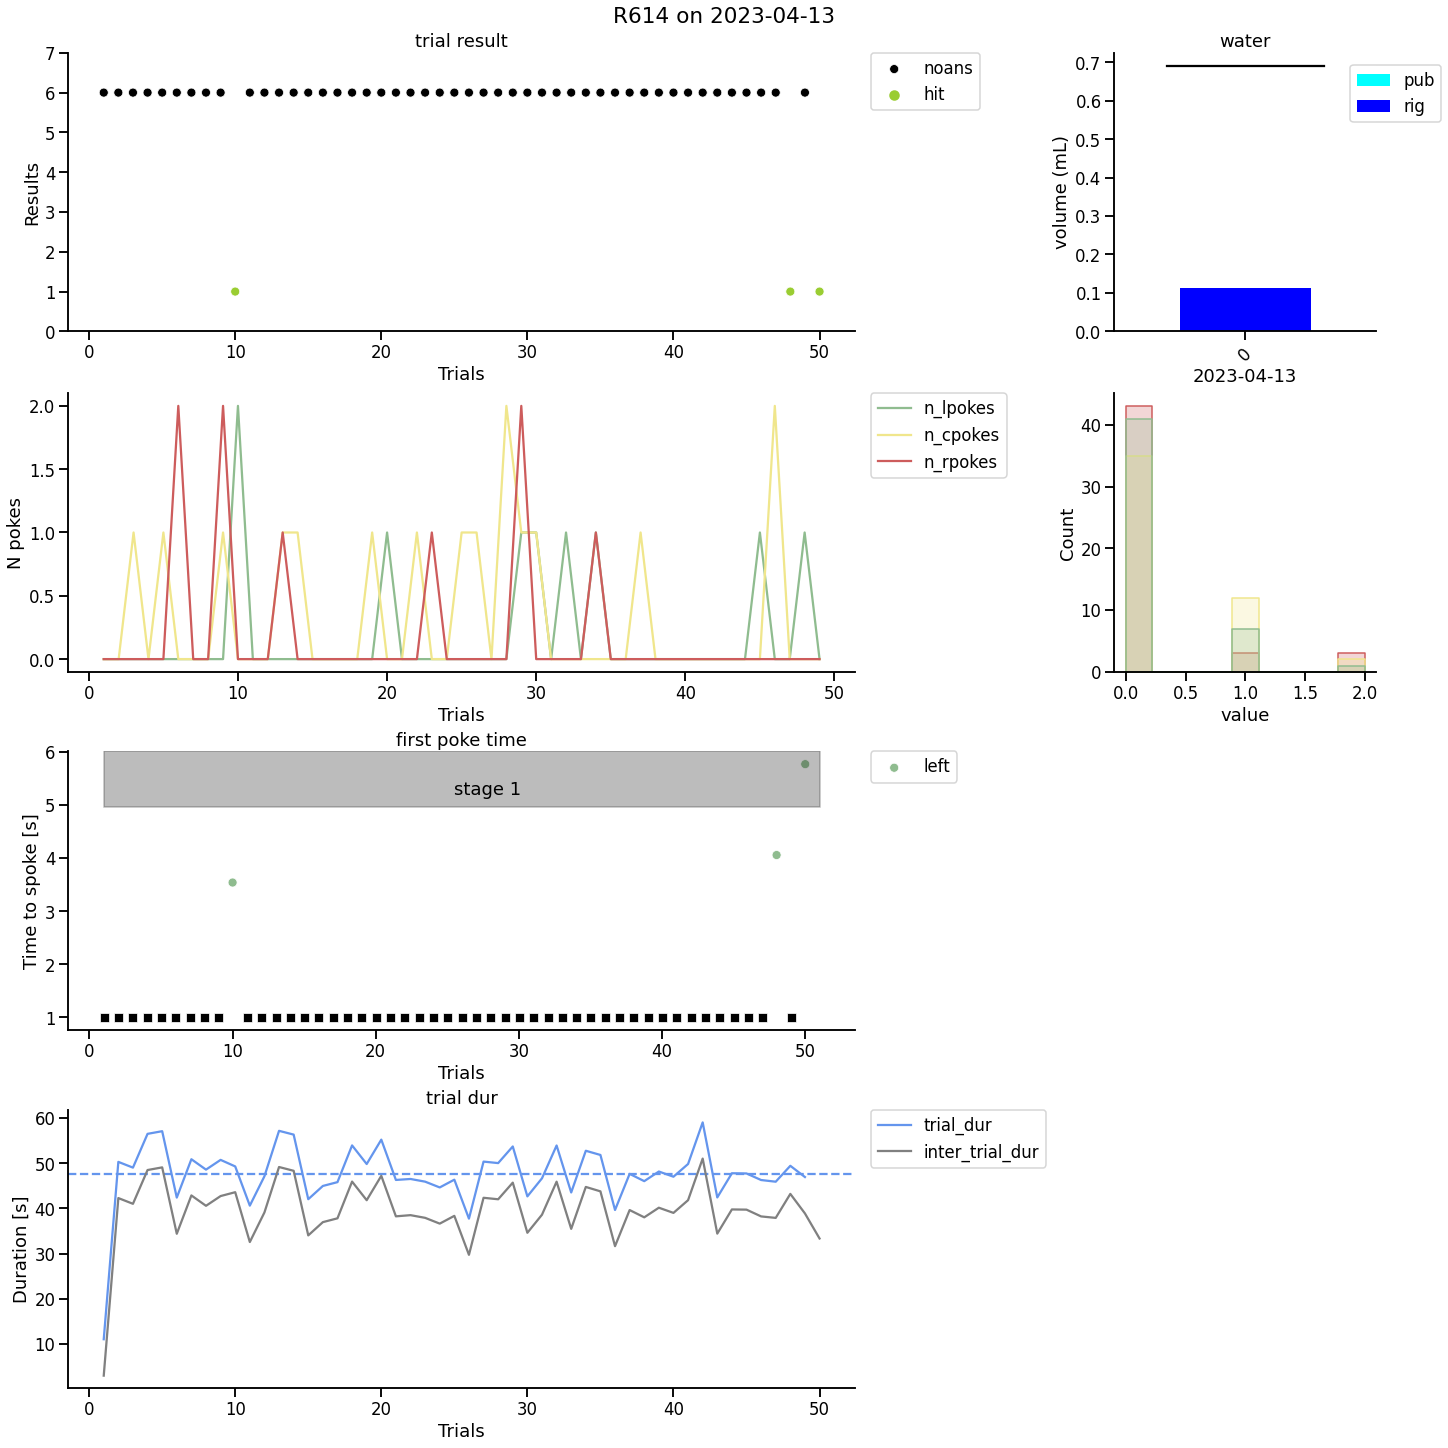

In [112]:

layout="""
    AAAB
    CCCD
    EEE.
    FFF.
    """
fig = plt.figure(constrained_layout=True,figsize=(20,20))
plt.suptitle(f"{animal_id} on {sub_df.date[0]}")
ax_dict = fig.subplot_mosaic(layout) #ax to plot to
# identify_axes(ax_dict) # prints the letter for id

plot_daily_results(sub_df,ax=ax_dict['A'], title="trial result")
plot_daily_water(sub_df, ax_dict['B'], title= "water")
plot_daily_npokes(sub_df,ax_dict['C'], plot_stage_info=False)
plot_daily_first_spoke(sub_df, ax_dict['E'], title="first poke time",plot_stage_info=True)
plot_daily_trial_dur(sub_df, ax_dict['F'], title="trial dur")


sns.histplot(data=pokes_df, x="value",
        palette=["darkseagreen", "khaki", "indianred"],
        hue="variable",
        element="step", ax=ax_dict['D'], legend=False)

